# *Problem Statement 1:*

# *Importing Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from io import StringIO
import seaborn as sns

# *Importing DataSet*

In [2]:
#importing dataset
df=pd.read_csv(r"C:\Users\Dell\Desktop\ML_Module_Exam\car.csv")

In [3]:
# url = "https://drive.google.com/file/d/1ZqQxi8i5nI0fGGb6gX4OrquDQ_YrH93F/view?usp=share_link"
# path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
# df=pd.read_csv(path)

# *1.Data understanding and exploration*

In [4]:
#Verifying first 5 records
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
#Verifying last 5 records
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
#Verifying any randomly 5 records
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
55,corolla altis,2009,3.60,15.04,70000,Petrol,Dealer,Automatic,0
266,amaze,2014,3.65,7.00,35000,Petrol,Dealer,Manual,0
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0
163,Bajaj Avenger 220 dtsi,2010,0.45,0.95,27000,Petrol,Individual,Manual,0


In [7]:
#Checking the dimensions of the dataset
df.shape

(301, 9)

### Observations : 
#####  1. total records : 301
#####   2. total features : 9

In [8]:
#Understanding the feature names, not null values ,dtypes and memory using info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
#Understanding the stastical data for numerical dtypefeatures
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# *2.Data cleaning*

#### 1. Handling Missing Values

In [10]:
#Checking whether missing values are present or not
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Observations : 
#####  No missing values are present in the dataset

#### 2. Handling Dulplicate Records

In [11]:
#Checking whether duplicate records are present or not
df.duplicated().sum()

2

### Observations : 
#####  There are duplicate records present in the dataset, so we will drop these two duplicate records 

In [12]:
df.drop_duplicates(keep='first',inplace=True)

In [13]:
#Verifying that duplicate records are dropped or not
df.duplicated().sum()

0

### Observations : 
#####  Successfully removed duplicate records

# *3.Data preparation*

In [14]:
#Car_name : Inspecting categorical data
df.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

<AxesSubplot:ylabel='Car_Name'>

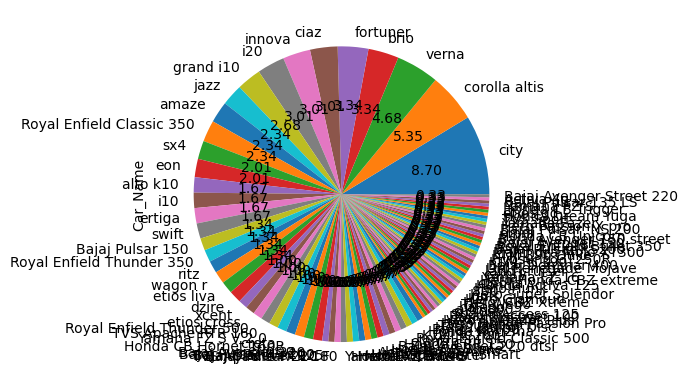

In [15]:
#Plotting a pie chart to understand the distribution of cars

df["Car_Name"].value_counts().plot(kind="pie",autopct="%.2f")

In [16]:
#Fuel_Type : : Inspecting categorical data
df.Fuel_Type.value_counts()

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

<AxesSubplot:ylabel='Fuel_Type'>

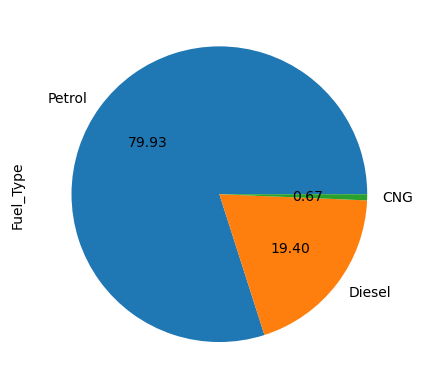

In [17]:
#Plotting a pie chart to understand the distribution

df["Fuel_Type"].value_counts().plot(kind="pie",autopct="%.2f")

In [18]:
#Seller_Type: : Inspecting categorical data
df.Seller_Type.value_counts()

Dealer        193
Individual    106
Name: Seller_Type, dtype: int64

<AxesSubplot:ylabel='Seller_Type'>

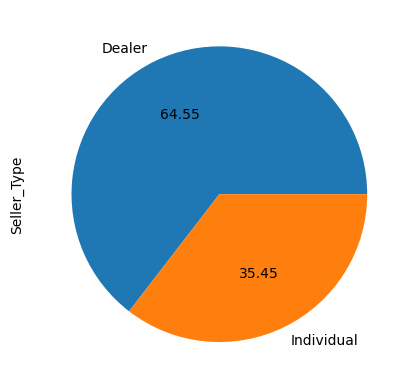

In [19]:
#Plotting a pie chart to understand the distribution

df["Seller_Type"].value_counts().plot(kind="pie",autopct="%.2f")

In [20]:
#Transmission : Inspecting categorical data
df.Transmission.value_counts()

Manual       260
Automatic     39
Name: Transmission, dtype: int64

<AxesSubplot:ylabel='Transmission'>

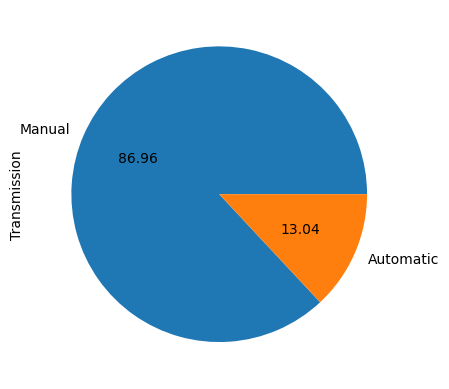

In [21]:
#Plotting a pie chart to understand the distribution

df["Transmission"].value_counts().plot(kind="pie",autopct="%.2f")

In [22]:
#Owner : Inspecting categorical data
df.Owner.value_counts()

0    288
1     10
3      1
Name: Owner, dtype: int64

<AxesSubplot:ylabel='Owner'>

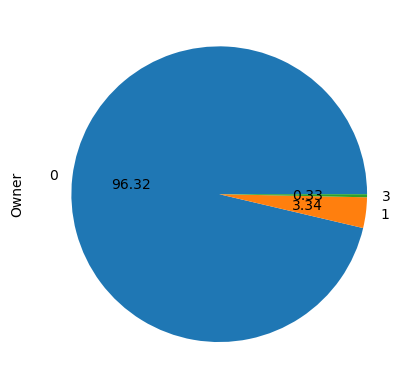

In [23]:
#Plotting a pie chart to understand the distribution

df["Owner"].value_counts().plot(kind="pie",autopct="%.2f")

In [24]:
#Correlation between numerical data in the datsset
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.234369,-0.053563,-0.525714,-0.181639
Selling_Price,0.234369,1.000000,0.876378,0.028566,-0.087880
Present_Price,-0.053563,0.876378,1.000000,0.205253,0.009947
Kms_Driven,-0.525714,0.028566,0.205253,1.000000,0.089367
Owner,-0.181639,-0.087880,0.009947,0.089367,1.000000


<AxesSubplot:>

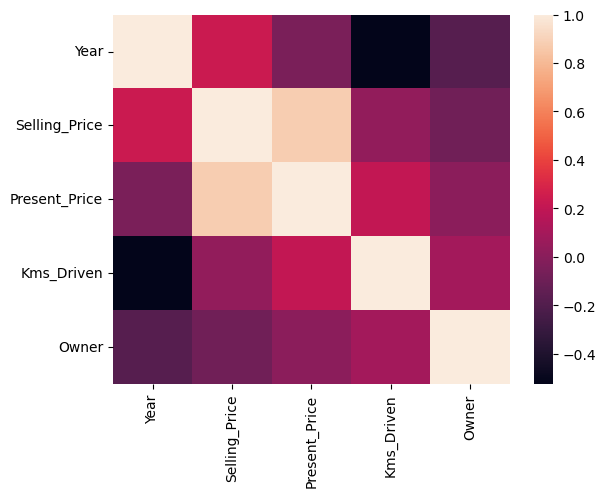

In [25]:
#Understanding the correlation between numerical features using heatmap of seaborn library
sns.heatmap(df.corr())

In [26]:
# pip install pandas-profiling

In [27]:
# import pandas_profiling
# from pandas_profiling import ProfileReport

In [28]:
# profile=ProfileReport(df)
# profile.to_file(output_file='output.html')

### Observations : 
    1. As from the categorical distribustion of data we found that feature 'Owner' has imbalanced data 
    hence we will drop 'Owner' column and also the feature 'Car_Name'.
    
    2. From numerical correlation distribustion we understand that correlation between numerical features is not that strong with price

In [29]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [30]:
#Dropping features observed
df=df.drop(['Car_Name','Year','Kms_Driven','Owner','Present_Price'],axis=1)

In [31]:
#Verifying dimensions after feature selections
df.shape

(299, 4)

# *5.Model building and evaluation*

In [36]:
#Creating dummy variables
dummy=pd.get_dummies(df[['Fuel_Type', 'Seller_Type', 'Transmission']])

In [37]:
#Verifying the column names of dummy columns which we have created
dummy.columns

Index(['Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

In [38]:
#Verifying the column names of our dataset
df.columns

Index(['Selling_Price', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [39]:
#Concatinating dummy and df
df=pd.concat([df,dummy],axis=1)

In [40]:
#Dropping original columns of dummies
df=df.drop(['Fuel_Type', 'Seller_Type', 'Transmission'],axis=1)

In [41]:
df.shape

(299, 8)

In [42]:
#Preparing data for X train
X=df.drop(["Selling_Price"],axis=1)

In [43]:
y=df["Selling_Price"]

In [44]:
#importing train test split
from sklearn.model_selection import train_test_split

In [45]:
#Splitting data into X_train,X_test,y_train ,y_test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [46]:
X_train.shape

(239, 7)

In [47]:
X_test.shape

(60, 7)

In [48]:
y_train.shape

(239,)

In [49]:
y_test.shape

(60,)

<AxesSubplot:>

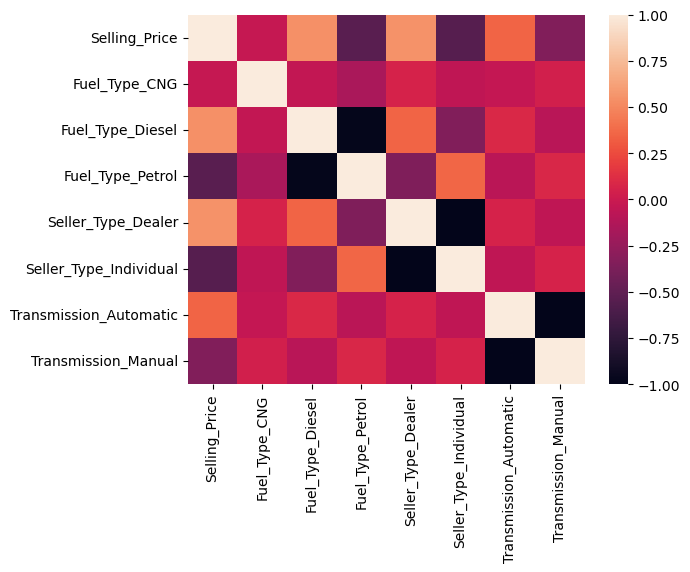

In [60]:
cor = df.corr()
top_corr_features = cor.index
sns.heatmap(df[top_corr_features].corr())

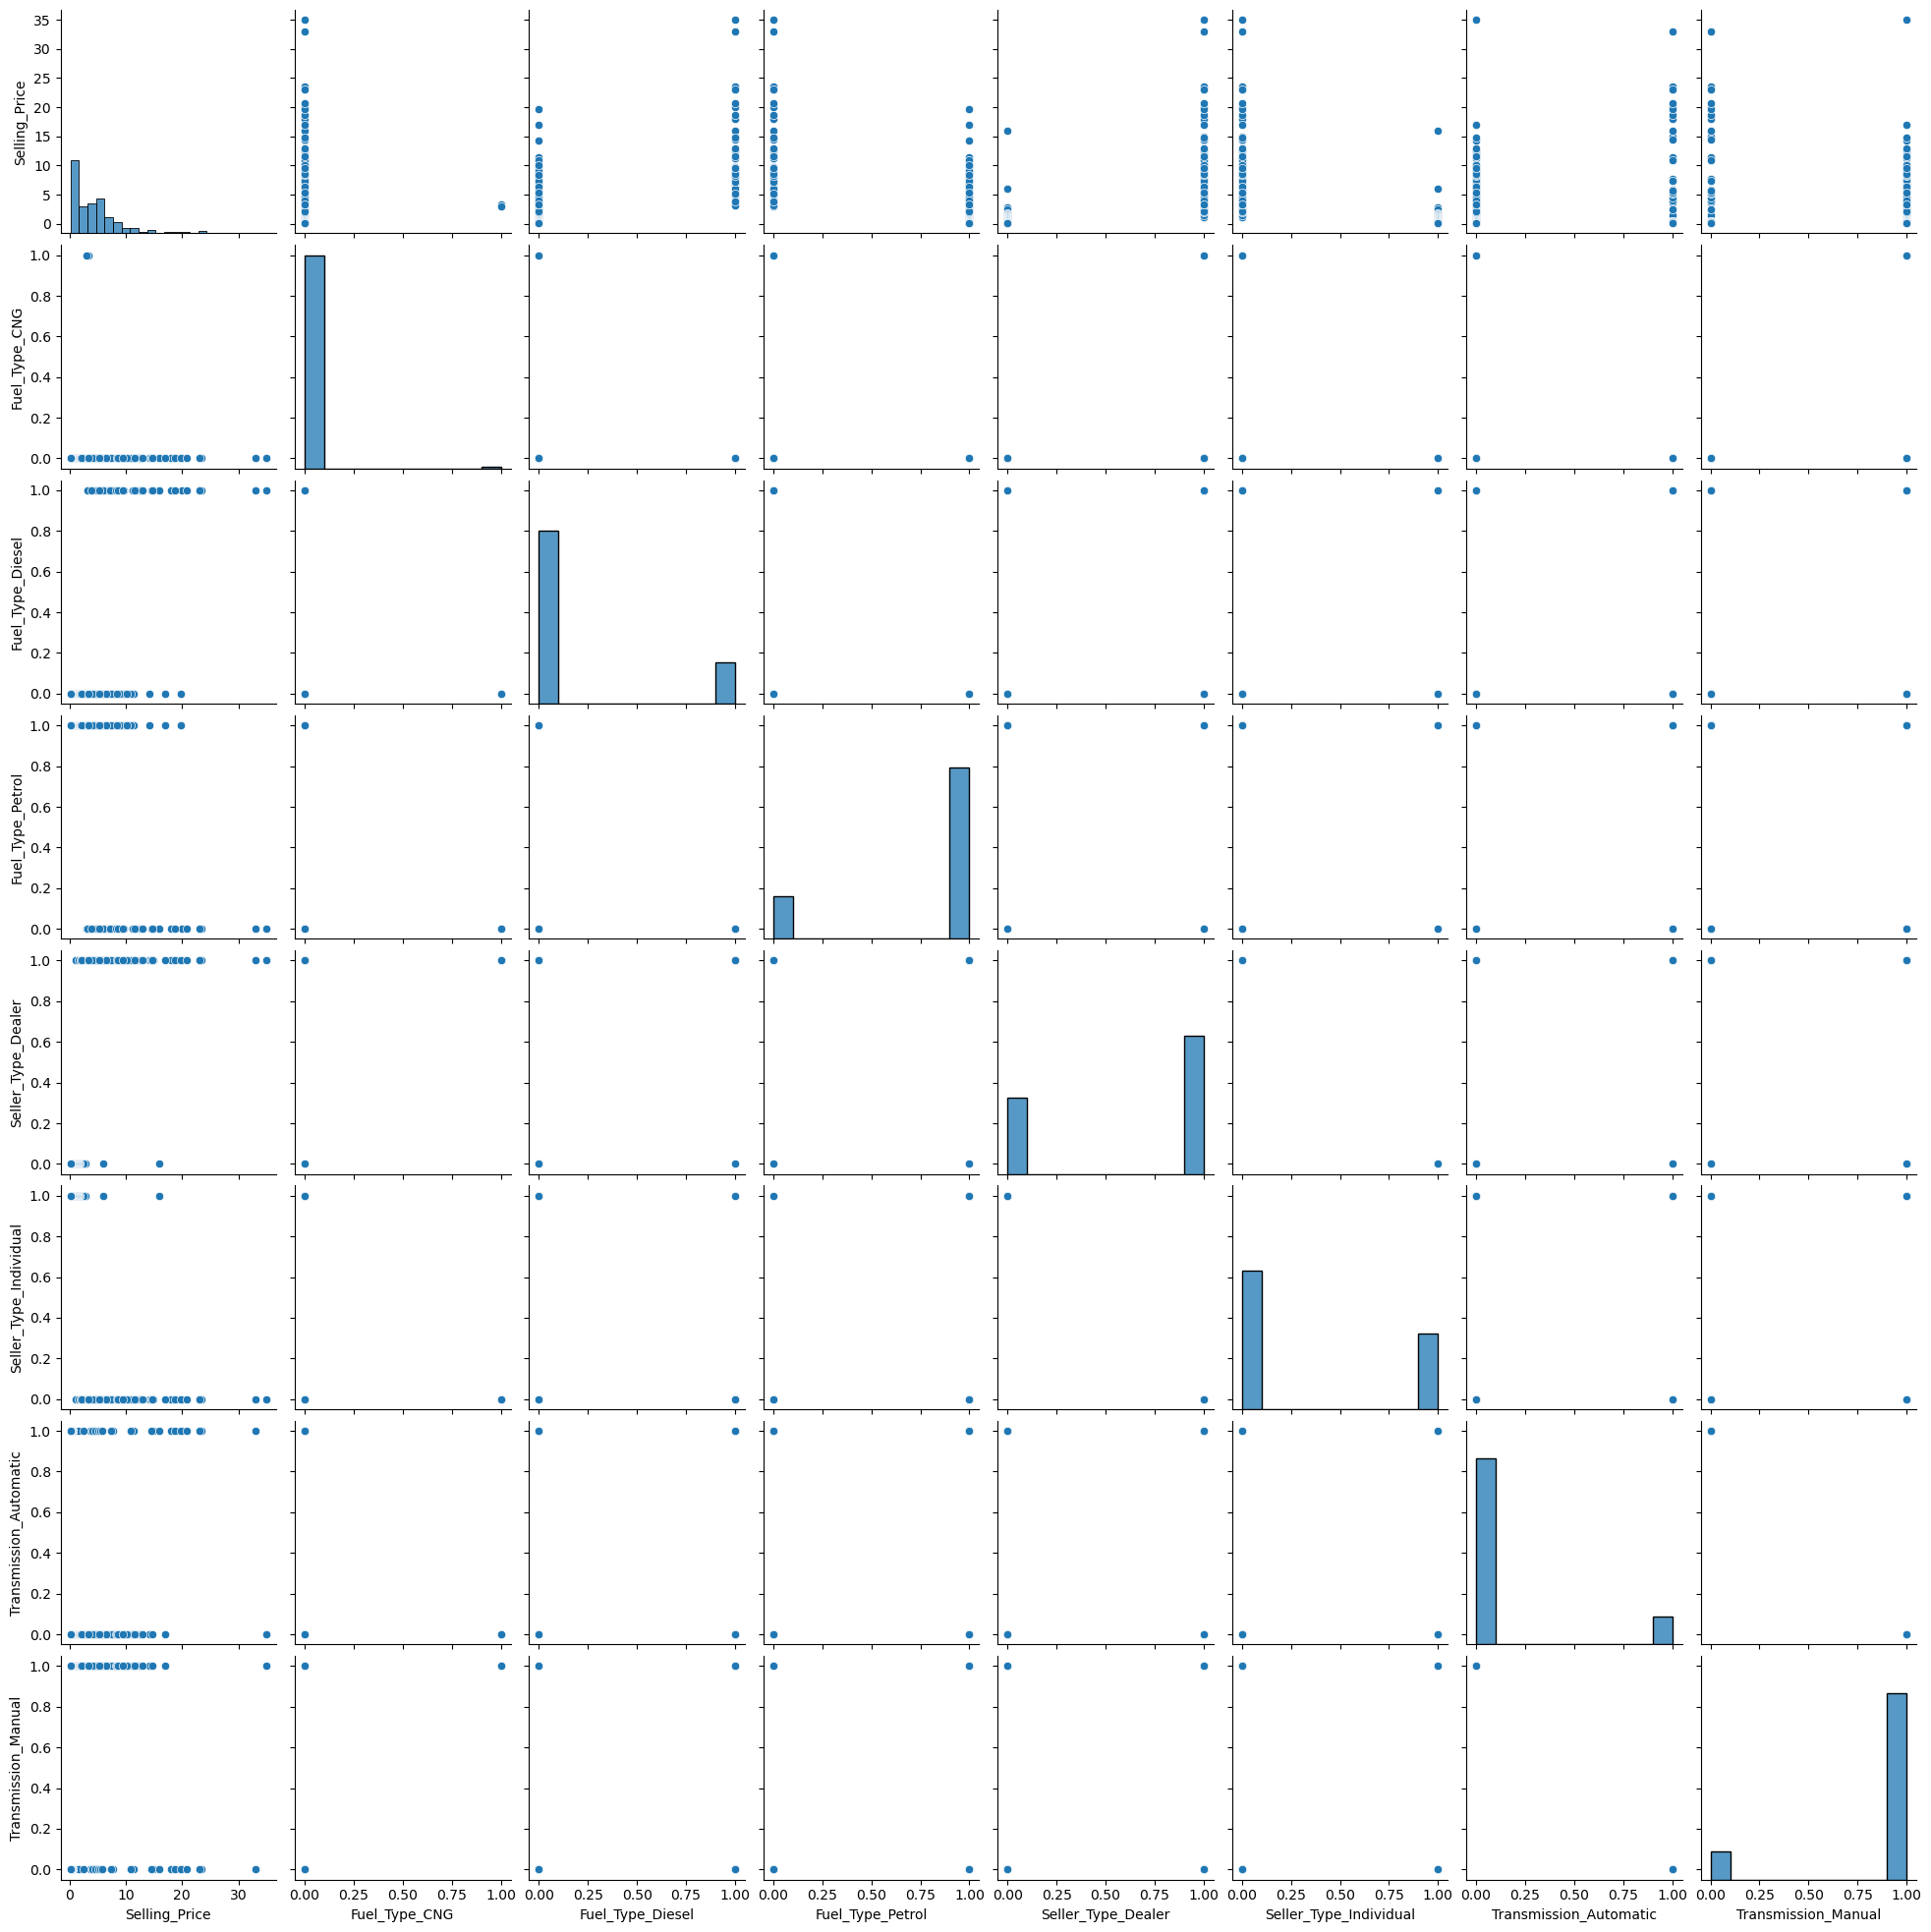

In [59]:
sns.pairplot(df)

# 1. Random Forest Regression

In [50]:
#importing RandomForestRegressor model class
from sklearn.ensemble import RandomForestRegressor

In [51]:
#creating object
rm=RandomForestRegressor(random_state=0)

In [52]:
rm.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [53]:
y_pred_rm=rm.predict(X_test)

In [61]:
y_pred_rm

array([ 5.04914627,  0.68359662,  7.07767552,  7.07767552,  5.04914627,
        0.68359662,  7.82977749,  7.07767552,  9.00501475,  0.68359662,
        5.04914627,  7.82977749,  0.75934859,  5.04914627,  5.04914627,
        5.04914627,  5.04914627,  7.82977749,  7.82977749,  5.04914627,
        0.68359662,  0.68359662,  0.68359662,  0.68359662,  7.82977749,
        0.68359662,  0.75934859,  7.07767552,  7.82977749,  5.04914627,
        7.07767552,  7.82977749,  7.82977749,  0.68359662,  5.04914627,
        0.68359662,  0.75934859,  0.68359662,  5.04914627,  7.82977749,
        5.04914627,  5.04914627, 20.88548747,  4.17788035,  5.04914627,
        0.68359662,  5.04914627,  7.82977749,  7.82977749,  5.04914627,
        7.82977749,  5.04914627,  0.68359662,  0.68359662,  5.04914627,
        7.07767552,  0.68359662,  0.68359662,  7.07767552,  0.75934859])

In [64]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

In [65]:
MAE=mean_absolute_error(y_test,y_pred_rm)
MAE

1.497919552678244

In [66]:
MSE=mean_squared_error(y_test,y_pred_rm)
MSE

4.30701029513695

In [69]:
RMSE=math.sqrt(MSE)
RMSE

2.0753337792116597

In [67]:
r2=r2_score(y_test,y_pred_rm)
r2

0.7537706160400629

# Conclusion :
        1. MAE = 1.497919552678244
        2. MSE = 4.30701029513695
        3. RMSE = 2.0753337792116597
        4. r2 =  0.7537706160400629      
        
        5. Comapny should focsed on Fuel_Type_Deisel,Seller_Type_dealer and Transsmission_Automatic variables

# 2. General Regression Model

In [54]:
#Model
import statsmodels.api as sm

In [55]:
X_train = sm.add_constant(X_train)

In [56]:
model1=sm.OLS(y_train,X_train)

In [57]:
model1=sm.OLS(y_train,X_train).fit()

In [58]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     67.73
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           5.33e-38
Time:                        16:30:32   Log-Likelihood:                -639.22
No. Observations:                 239   AIC:                             1288.
Df Residuals:                     234   BIC:                             1306.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2